In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
from scipy.stats import pearsonr 
import matplotlib.pyplot as plt
import glob
import os
import time
import xarray as xr

# import dask.array as da
from dask.diagnostics import ProgressBar
from dask.distributed import Client, LocalCluster

import matplotlib.patheffects as PathEffects

In [2]:
# fname = '~/Documents/projects/thesis/results/output/compiled_SUPERsnow.nc' #ARS
fname = '~/Documents/research/sierra/data/compiled_SUPERsnow.nc' #BSU
#~~~~ ds full
ds = xr.open_dataset(fname,  chunks={'time':1,'x':1000,'y':1000})
ds.close()

#~~~~ ds peak
dpeak = ds.isel(time=[0,7,18,30,42,49]) #0,7,22,28,41,49]
dpeak.close()

ds = dpeak
ds.close()

In [3]:
# legends/labels
d_str = pd.to_datetime(ds['time'].values).strftime("%Y-%m-%d")
print('number of legend labels:', len(d_str))
# print(d_str[0][:4])

number of legend labels: 6


## experiement with a moving window

In [6]:
# ds.rolling(time=2, center=True).mean()

## select portions of 3m data

<function matplotlib.pyplot.show(*args, **kw)>

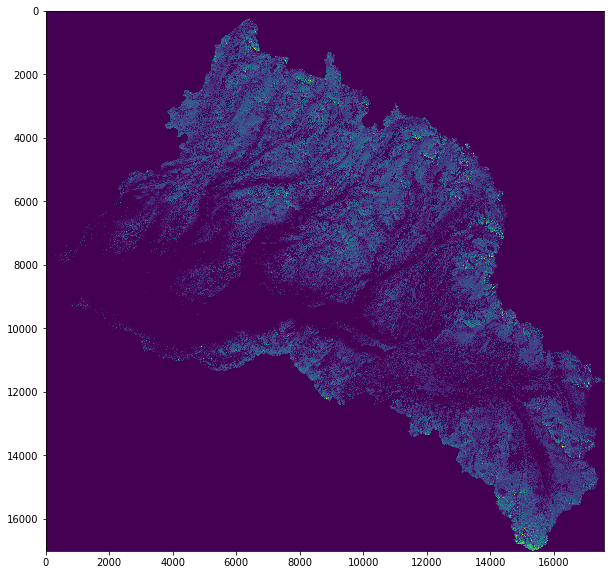

In [71]:
plt.figure(figsize=(10,10))
plt.imshow(ds.snow.isel(time=1))

plt.show

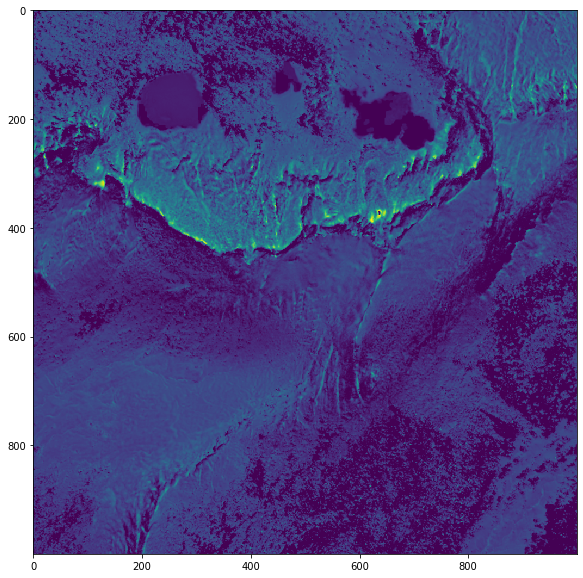

In [33]:
# d = ds.isel(x=slice(13000,14000), y=slice(9500,10500))
# plt.figure(figsize=(10,10))
# plt.imshow(d.snow.isel(time=1))

1953.1694876666666
0
24476


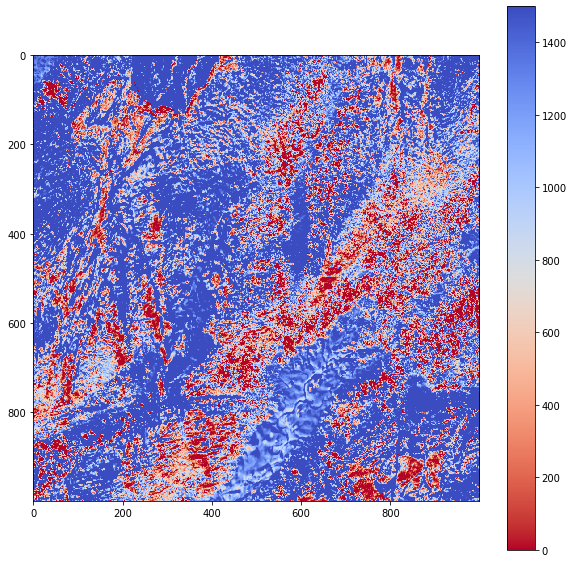

In [70]:
d = ds.isel(x=slice(8400,9400), y=slice(3000,4000))
plt.figure(figsize=(10,10))
plt.imshow(d.snow.isel(time=1), cmap='coolwarm_r', vmax=1500)
plt.colorbar()
print(d.snow.mean().values)
print(d.snow.min().values)
print(d.snow.max().values)

upper left peak is Acker Peak, 10,900ft, 2 valleys west of slide canyon

In [54]:
#attempt at slide canyon! coords = 285512.57, 4218970.14
# d = ds.sel(x=slice(285000,286000), y=slice(4218500,4219500))
d = ds.sel(x=slice(286000,287000), y=slice(4218000,4219000))
# plt.figure(figsize=(10,10))
# plt.imshow(d.snow.isel(time=1), cmap='coolwarm')
d

<xarray.Dataset>
Dimensions:  (time: 6, x: 333, y: 0)
Coordinates:
  * x        (x) float32 286002.0 286005.0 286008.0 ... 286995.0 286998.0
  * y        (y) float32 
  * time     (time) datetime64[ns] 2013-04-03 2014-04-07 ... 2018-04-23
    mask     (y, x) uint8 dask.array<chunksize=(0, 333), meta=np.ndarray>
    dem      (y, x) float32 dask.array<chunksize=(0, 333), meta=np.ndarray>
    veg      (y, x) float32 dask.array<chunksize=(0, 333), meta=np.ndarray>
Data variables:
    snow     (time, y, x) int16 dask.array<chunksize=(1, 0, 333), meta=np.ndarray>

In [18]:
print(ds.x.values.min())
print(ds.x.values.max())
print(ds.y.values.min())
print(ds.y.values.max())

254007.0
306711.0
4179324.0
4230327.0


In [51]:
print(d.x.values.min())
print(d.x.values.max())
print(d.y.values.min())
print(d.y.values.max())

279207.0
282204.0
4218330.0
4221327.0


In [57]:
m = (d.x.values.min() + d.x.values.max()) /2
m

280705.5

In [58]:
m = (d.y.values.min() + d.y.values.max()) /2
m

4219828.5